In [ ]:
import keras
import tensorflow as tf

In [ ]:
generator=keras.models.load_model('/content/drive/MyDrive/brain tumor segmentation/GANS/asad data/saved models /epoch 60/generator')

In [ ]:
#Initialising Hyper Parameters

#Uncomment one of the two below lines. For some reason, on some computers the first one works, while on others the second.
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import adam
import tensorflow as tf

import numpy as np
import keras
#for consistency of random numbers and our images

noise_dim = 100  # input dimension of random vector - the vector that goes into the generator

batch_size = 64   #How many images do we want to include in each batch
steps_per_epoch = 2500  #How many steps do we want to take per iteration of our training set (number of batches)
epochs = 60      #How many iterations of our training set do we want to do.

#change the below values to the dimensions of your image. The channels number refers to the number of colors
img_rows, img_cols, channels = 128, 128, 4

#These are the recommended values for the optimizer
optimizer = Adam(0.0002, 0.5)

In [ ]:
import matplotlib.pyplot as plt
def show_images(noise, size_fig):
    generated_images = generator.predict(noise)   #Create the images from the GAN.
    
    generated_images=np.argmax(generated_images,axis=3)
    
    plt.figure(figsize=size_fig)
    
    for i, image in enumerate(generated_images):
        plt.subplot(size_fig[0], size_fig[1], i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)))    #If the image is grayscale, as in our case, then we will reshape the output in the following way.
                                                                            #Also, we set the coloring to grayscale so that it doesn't look like it came out of an infrared camera :)
        else:
            plt.imshow(image.reshape((img_rows, img_cols)))
        plt.axis('off')
    
    plt.tight_layout()   #Tight layout so that all of the generated images form a nice grid
    plt.show()
    return 

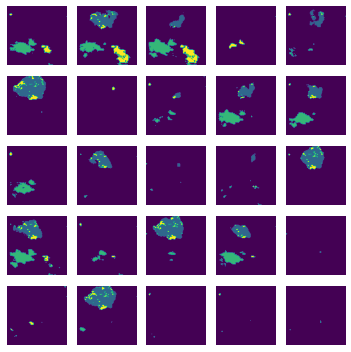

In [ ]:
noise = np.random.normal(0, 1, size=(25, noise_dim))
show_images(noise, (5, 5))


In [ ]:
generated_images = generator.predict(noise) 
generated_images=np.argmax(generated_images,axis=3)
generated_images.shape

(25, 128, 128)

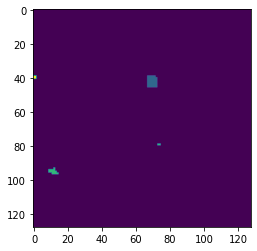

In [ ]:
plt.imshow(generated_images[12])

In [1]:
im_list=[]
counter=0
for i in range(240):
  noise = np.random.normal(0, 1, size=(25, noise_dim))
  generated_images = generator.predict(noise)   #Create the images from the GAN.
 
  for j in range(generated_images.shape[0]):
    a=generated_images[j]
    im_list.append(a)
    
  counter=counter+1
  print(counter)



NameError: ignored

In [ ]:
img_arr=np.asarray(im_list)
img_arr.shape

(6000, 128, 128, 4)

In [ ]:
np.unique(img_arr)

array([-0.998586  , -0.9970544 , -0.99572635, ...,  0.9999999 ,
        0.99999994,  1.        ], dtype=float32)

In [ ]:
argmaxed=np.argmax(img_arr,axis=3)

In [ ]:
np.unique(argmaxed)

array([0, 1, 2, 3])

In [ ]:
arg_max=tf.keras.utils.to_categorical(argmaxed)
arg_max.shape

(6000, 128, 128, 4)

In [ ]:
np.unique(arg_max)

array([0., 1.], dtype=float32)

In [ ]:
path='/content/drive/MyDrive/Brain_tumor_Segmentation/asad data/results/final Results all modility/results/complete results/results for combined with different ratios x_test real/4:1/xtest ytest/'

In [ ]:
np.save(path+'masks',argmaxed)

**LETS GENERATE THE mri FOR THESE MASKS**

In [ ]:
c_gan_generator=keras.models.load_model('/content/drive/MyDrive/Brain_tumor_Segmentation/huzaifa_data/Models/Models/C_Gans_Generator/CGAN_model_generator.h5')

In [ ]:
mri_pred=c_gan_generator.predict(img_arr)

In [ ]:
mri_pred.shape

(6000, 128, 128, 1)

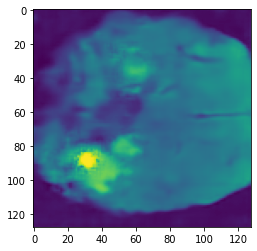

In [ ]:
plt.imshow(mri_pred[110,:,:,0])

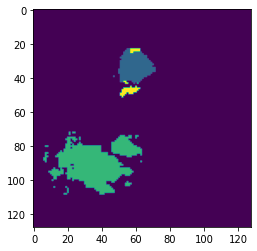

In [ ]:

plt.imshow(argmaxed[110])

In [ ]:
np.min(mri_pred)

-0.26379976

In [ ]:
b = (mri_pred - np.min(mri_pred))/np.ptp(mri_pred)
np.min(b)

0.0

In [ ]:
np.save(path+'MRI',b)

NameError: ignored